### Programming for Biomedical Informatics
#### Week 2 - FTP Bulk Download & APIs

This week we're going to practice using bulk download and API in a practical example. This week we are going to be looking at a resource called GenCC - The Gene Curation Collection - https://thegencc.org

GenCC is primarily focussed on providing a unified source of gene-disease relationships that is harmonised across the various international efforts that operate in this space. In the process of doing so they are establishing standards for curation and annotation to maximise the consitency and useability of their data.

Our efforts today will focus on a full FTP download of the GenCC data, some parsing, and use of the API at Bioportal to gather more information about some of the elements of the GenCC data. This is a **slightly** contrived example, but hopefully it is both interesting and useful to give you an idea of how these two approaches can be used together.

In [3]:
# Step One - Bulk Download of GenCC data

'''The url to the latest version of the data is here - https://search.thegencc.org/download/action/submissions-export-tsv''' # flat file of the data 

#pseudocode 1 - download the data using the urllib library
import urllib.request

url = 'https://search.thegencc.org/download/action/submissions-export-tsv'
filename = 'gencc_data.tsv'

urllib.request.urlretrieve(url, filename)

#pseudocode 2 - read the data into a pandas dataframe *you can see from the url that the data is tab separated*
import pandas as pd 

df = pd.read_csv(filename, sep = '\t') # specify tab seperated 

#pseudocode 3 - look ay the first few rows of the dataframe
df.head()

## terminology 
# moi = mode of inheritance, important to understand the impact of genetics of a disease

,uuid,gene_curie,gene_symbol,disease_curie,disease_title,disease_original_curie,disease_original_title,classification_curie,classification_title,moi_curie,...,submitted_as_submitter_name,submitted_as_classification_id,submitted_as_classification_name,submitted_as_date,submitted_as_public_report_url,submitted_as_notes,submitted_as_pmids,submitted_as_assertion_criteria_url,submitted_as_submission_id,submitted_run_date
0,GENCC_000101-HGNC_10896-OMIM_182212-HP_0000006...,HGNC:10896,SKI,MONDO:0008426,Shprintzen-Goldberg syndrome,OMIM:182212,OMIM:182212,GENCC:100001,Definitive,HP:0000006,...,Ambry Genetics,GENCC:100001,Definitive,2018-03-30 13:31:56,NaN,NaN,NaN,PMID: 28106320,1034,2020-12-24
1,GENCC_000101-HGNC_16636-OMIM_171300-HP_0000006...,HGNC:16636,KIF1B,MONDO:0008233,pheochromocytoma,OMIM:171300,OMIM:171300,GENCC:100003,Moderate,HP:0000006,...,Ambry Genetics,GENCC:100003,Moderate,2019-12-04 13:30:43,NaN,NaN,NaN,PMID: 28106320,69237,2020-12-24
2,GENCC_000101-HGNC_16636-OMIM_118210-HP_0000006...,HGNC:16636,KIF1B,MONDO:0007308,Charcot-Marie-Tooth disease type 2A1,OMIM:118210,OMIM:118210,GENCC:100004,Limited,HP:0000006,...,Ambry Genetics,GENCC:100004,Limited,2022-09-02 00:00:00,NaN,NaN,NaN,https://onlinelibrary.wiley.com/doi/10.1002/hu...,61327,2023-08-19
3,GENCC_000101-HGNC_17939-OMIM_617532-HP_0000007...,HGNC:17939,SLC45A1,MONDO:0044322,intellectual developmental disorder with neuro...,OMIM:617532,OMIM:617532,GENCC:100004,Limited,HP:0000007,...,Ambry Genetics,GENCC:100004,Limited,2020-06-26 13:32:00,NaN,NaN,NaN,PMID: 28106320,72178,2020-12-24
4,GENCC_000101-HGNC_11071-OMIM_616291-HP_0000007...,HGNC:11071,SLC9A1,MONDO:0014572,Lichtenstein-Knorr syndrome,OMIM:616291,OMIM:616291,GENCC:100004,Limited,HP:0000007,...,Ambry Genetics,GENCC:100004,Limited,2018-08-31 13:32:02,NaN,NaN,NaN,PMID: 28106320,1705,2020-12-24


In [4]:
# Step Two - Gene Counts by Disease

'''Now we want a summary of how many genes have been annotated to each disease.'''

#pseudocode 4 - group the data by disease and count the number of genes for each disease (think of the pandas function that does this)
disease_gene_counts = df.groupby('disease_title')['gene_symbol'].count()

#pseudocode 5 - sort the data in descending order
disease_gene_counts = disease_gene_counts.sort_values(ascending=False)

#pseudocode 6 - look at the first few rows of the dataframe
disease_gene_counts.head()

disease_title
complex neurodevelopmental disorder    177
Leigh syndrome                         128
mitochondrial disease                  127
retinitis pigmentosa                    94
nonsyndromic genetic hearing loss       93
Name: gene_symbol, dtype: int64

In [8]:
'''There's a nice package called PrettyTable that can be used to print the data in a nice table format. You can install it using 'conda install prettytable'''

from prettytable import PrettyTable

#make some simple two-column data
data = [['disease1', 1000], ['disease2', 2000], ['disease3', 3000], ['disease4', 4000], ['disease5', 5000]]

# create a table
table = PrettyTable()

# add the columns
table.field_names = ['Disease Name','Number of Genes']

# add the rows
for i in range(len(data)):
    table.add_row(data[i])

# print the table
print(table)

# pseudocode 7 - create a table using the PrettyTable package
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ['Disease Name','Number of Genes']

for disease, count in disease_gene_counts.head(10).items():
    table.add_row([disease, count])

print(table)



+--------------+-----------------+
| Disease Name | Number of Genes |
+--------------+-----------------+
|   disease1   |       1000      |
|   disease2   |       2000      |
|   disease3   |       3000      |
|   disease4   |       4000      |
|   disease5   |       5000      |
+--------------+-----------------+
+-------------------------------------+-----------------+
|             Disease Name            | Number of Genes |
+-------------------------------------+-----------------+
| complex neurodevelopmental disorder |       177       |
|            Leigh syndrome           |       128       |
|        mitochondrial disease        |       127       |
|         retinitis pigmentosa        |        94       |
|  nonsyndromic genetic hearing loss  |        93       |
|            schizophrenia            |        89       |
|  hearing loss, autosomal recessive  |        79       |
|          Tourette syndrome          |        78       |
|  syndromic intellectual disability  |        

<Axes: xlabel='Number of Genes', ylabel='Disease Name'>

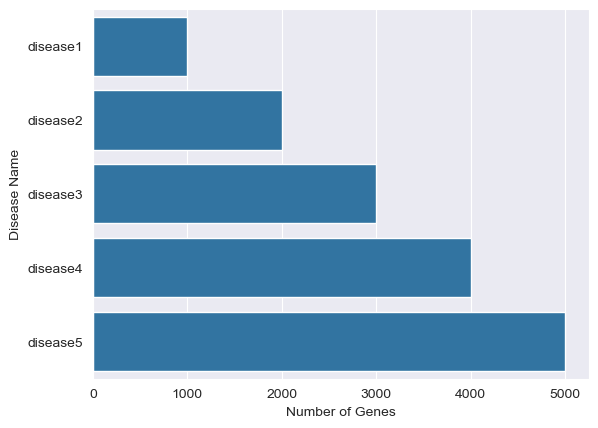

In [9]:

'''There is a very nice plotting package called seaborn that can be used to create plots. You can install it using 'conda install seaborn.
Here's an example of how to create a horizontal bar chart using seaborn'''

#plot a horizontal bar chart of the data
import seaborn as sns
import pandas as pd

# set the style
sns.set_style('darkgrid')

# plot the data
sns.barplot(x='Number of Genes', y='Disease Name', data=pd.DataFrame(data, columns=['Disease Name', 'Number of Genes']))

{'Disease Name': Index(['complex neurodevelopmental disorder', 'Leigh syndrome',
       'mitochondrial disease', 'retinitis pigmentosa',
       'nonsyndromic genetic hearing loss', 'schizophrenia',
       'hearing loss, autosomal recessive', 'Tourette syndrome',
       'syndromic intellectual disability', 'primary ciliary dyskinesia',
       ...
       'lymphatic malformation 13', 'X-linked Ehlers-Danlos syndrome',
       'long QT syndrome 6', 'Wolman disease',
       'long chain acyl-CoA dehydrogenase deficiency', 'long qt syndrome 8',
       'Wolf-Hirschhorn syndrome', 'Wilms tumor 5',
       'lymphatic malformation 10',
       'megalencephalic leukoencephalopathy with subcortical cysts 3'],
      dtype='object', name='disease_title', length=7249), 'Number of Genes': array([177, 128, 127, ...,   1,   1,   1], dtype=int64)}


<Axes: xlabel='Number of Genes', ylabel='Disease Name'>

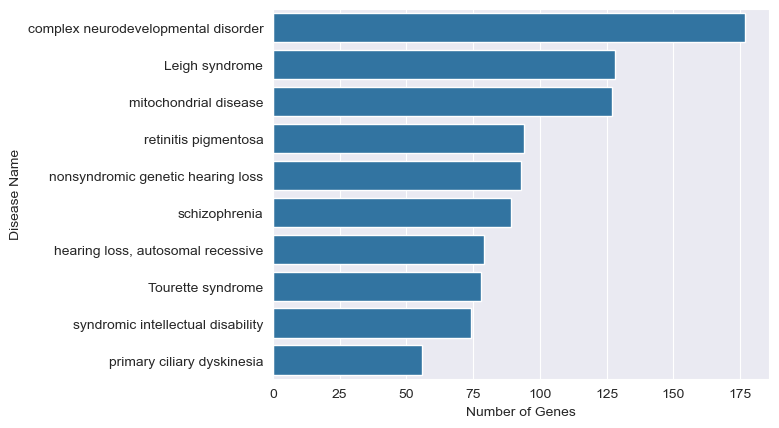

In [10]:

#pseudocode 8 - plot the 10 diseases with the most genes
import seaborn as sns
sns.set_style('darkgrid')

data = {'Disease Name': disease_gene_counts.index, 'Number of Genes': disease_gene_counts.values}
print(data)

# create a dataframe 
plotdf = pd.DataFrame(data, columns=['Disease Name', 'Number of Genes'])
sns.barplot(x='Number of Genes', y='Disease Name', data=plotdf.head(10))


+-------------------------------+-----------------+
|      Classification Title     | Number of Genes |
+-------------------------------+-----------------+
|             Strong            |       7137      |
|           Supportive          |       5330      |
|           Definitive          |       4378      |
|            Limited            |       2889      |
|            Moderate           |       1850      |
| No Known Disease Relationship |       243       |
|       Disputed Evidence       |       195       |
|        Refuted Evidence       |        38       |
+-------------------------------+-----------------+
{'Classification Title': Index(['Strong', 'Supportive', 'Definitive', 'Limited', 'Moderate',
       'No Known Disease Relationship', 'Disputed Evidence',
       'Refuted Evidence'],
      dtype='object', name='classification_title'), 'Number of Genes': array([7137, 5330, 4378, 2889, 1850,  243,  195,   38], dtype=int64)}


<Axes: xlabel='Number of Genes', ylabel='Classification Title'>

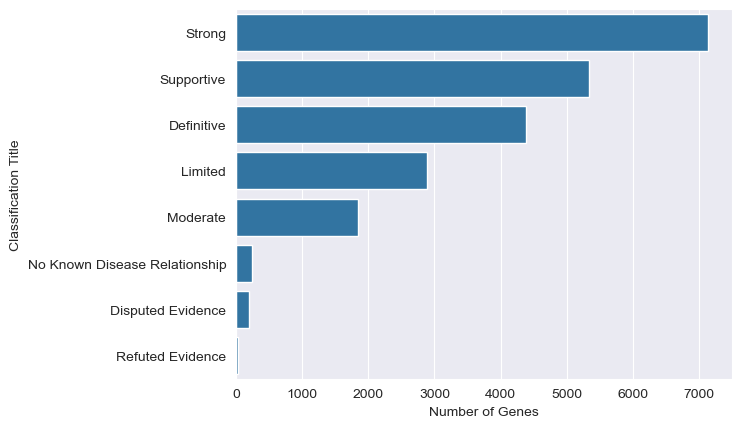

In [11]:
# Step Three - Gene-Disease Confidence

'''When making decisions about gene disease relationships there are a complex set of criteria. The result is a categorical set of keywords that describe the confidence
of assertions. These are stored in the 'classification_title field of the original data'''

#pseudocode 9 - group the data by classification_title (confidence categories) and count the number of genes for each
classification_gene_counts = df.groupby('classification_title')['gene_symbol'].count()
 
#pseudocode 10 - sort the data in descending order
classification_gene_counts = classification_gene_counts.sort_values(ascending = False)

#pseudocode 11 - look at the first few rows of the dataframe
classification_gene_counts.head()

#pseudocode 12 - create a table using the PrettyTable package
table = PrettyTable()

table.field_names = ['Classification Title','Number of Genes']

for classification_title, count in classification_gene_counts.head(10).items():
    table.add_row([classification_title, count])

print(table)

#pseudocode 13 - plot the classification_titles with the most genes
sns.set_style('darkgrid')

data = {'Classification Title': classification_gene_counts.index, 'Number of Genes': classification_gene_counts.values}
print(data)

# create a dataframe 
plotdf = pd.DataFrame(data, columns=['Classification Title', 'Number of Genes'])
sns.barplot(x='Number of Genes', y='Classification Title', data=plotdf.head(10))





In [13]:
# Step Four - Modes of Inheritance

'''Many of these diseases are Mendelian diseases. This means that they are caused by a mutation in a single gene. These mutations are inherited in a particular way.
GenCC captures this information in the 'moi_curie' field'''

#pseudocode 14 - group the data by moi_curie (modes of inheritance) and count the number of genes for each
moi_curie_gene_counts = df.groupby('moi_curie')['gene_symbol'].count()
print(moi_curie_gene_counts)
'''This is good but the values we have here are accession ids that aren't very informative
We know that terms (classes) like 'HP:0000006' are actually from the Human Phenotype Ontology (HPO)
We're  going to use the BioPortal API to get infromation about these classes and then finish by merging these data with our table'''


moi_curie
HP:0000005      894
HP:0000006     8999
HP:0000007    10628
HP:0001417     1103
HP:0001419      144
HP:0001423       26
HP:0001427      111
HP:0001442        9
HP:0001450        2
HP:0010984        1
HP:0012274        5
HP:0012275        4
HP:0032113      134
Name: gene_symbol, dtype: int64


"This is good but the values we have here are accession ids that aren't very informative\nWe know that terms (classes) like 'HP:0000006' are actually from the Human Phenotype Ontology (HPO)\nWe're  going to use the BioPortal API to get infromation about these classes and then finish by merging these data with our table"

In [31]:
'''first we need an API key from BioPortal. You can create an account on BioPortal for free and get an API key.
https://bioportal.bioontology.org/
For this example I will use my API key - note how I have it stored in a file in a separate folder and exclude this from the git repository'''

# set cd to current folder
%cd C:\Users\s2712192\OneDrive - University of Edinburgh\Taught Courses\Programming for Biomedical Informatics\pbi

#load my API key for BioPortal
# open the folder 'Api Keys' and read the file 'bioportal.txt'
with open("Api Keys/bioportal.txt", "r") as file:
    apikey = file.read().strip()

'''Here is an example of how you can use the requests library to get information from the BioPortal API'''

#find details for an ontology term using the BioPortal API
import requests
import json

#set the URL for the BioPortal API - here we query with a fixed HP class id
url = 'http://data.bioontology.org/ontologies/HP/classes/HP:0000006?apikey='+apikey

#send the request
response = requests.get(url)

#parse the JSON in the response
class_info = response.json()

#display the JSON (for interest!)
print(json.dumps(class_info, indent=2))

#display the keys in the JSON (for interest!)
print(class_info.keys())

#display the values for the keys
print(class_info['@id'],class_info['prefLabel'])
print(class_info['definition'][0])

C:\Users\s2712192\OneDrive - University of Edinburgh\Taught Courses\Programming for Biomedical Informatics\pbi
{
  "prefLabel": "Autosomal dominant inheritance",
  "synonym": [
    "Autosomal dominant form",
    "Autosomal dominant type",
    "Autosomal dominant",
    "monoallelic_autosomal"
  ],
  "definition": [
    "A mode of inheritance that is observed for traits related to a gene encoded on one of the autosomes (i.e., the human chromosomes 1-22) in which a trait manifests in heterozygotes. In the context of medical genetics, an autosomal dominant disorder is caused when a single copy of the mutant allele is present. Males and females are affected equally, and can both transmit the disorder with a risk of 50% for each child of inheriting the mutant allele."
  ],
  "cui": [],
  "semanticType": [],
  "obsolete": false,
  "@id": "http://purl.obolibrary.org/obo/HP_0000006",
  "@type": "http://www.w3.org/2002/07/owl#Class",
  "links": {
    "self": "https://data.bioontology.org/ontolog

In [58]:
#pseudocode 15 - using the unique accession ids in the moi_curie field, get the names of the classes from the BioPortal API by modifying the code above

# using unique moi_curie values, query the BioPortal API to get the names of the classes
moi_curie_unique = df['moi_curie'].unique()
print(moi_curie_unique)

class_labels = {}
for moi_curie in moi_curie_unique:
    url = 'http://data.bioontology.org/ontologies/HP/classes/'+moi_curie+'?apikey='+apikey
    #send the request
    response = requests.get(url)

    #parse the JSON in the response
    class_info = response.json()

    # print the class label 
    class_labels[moi_curie] = class_info['prefLabel']


['HP:0000006' 'HP:0000007' 'HP:0001417' 'HP:0000005' 'HP:0001450'
 'HP:0001419' 'HP:0001423' 'HP:0012275' 'HP:0001442' 'HP:0001427'
 'HP:0012274' 'HP:0010984' 'HP:0032113']


In [59]:

#pseudocode 16 - merge the data with the moi_curie field with the data from the BioPortal API so now we have a dataframe that contains
# the mode of inheritance and the number of genes for each and the name of the mode of inheritance (don't put the definition in the table as it's too long)
df = pd.DataFrame(list(class_labels.items()), columns=['moi_curie', 'class_name'])

# Display the DataFrame
print(df)

     moi_curie                                         class_name
0   HP:0000006                     Autosomal dominant inheritance
1   HP:0000007                    Autosomal recessive inheritance
2   HP:0001417                               X-linked inheritance
3   HP:0000005                                Mode of inheritance
4   HP:0001450                               Y-linked inheritance
5   HP:0001419                     X-linked recessive inheritance
6   HP:0001423                      X-linked dominant inheritance
7   HP:0012275  Autosomal dominant inheritance with maternal i...
8   HP:0001442                      Typified by somatic mosaicism
9   HP:0001427                          Mitochondrial inheritance
10  HP:0012274  Autosomal dominant inheritance with paternal i...
11  HP:0010984                                Digenic inheritance
12  HP:0032113                           Semidominant inheritance


#### Well done!
#### You've now practised FTP download, API use and also completed some data manipulation using Pandas, PrettyTable, and plotting with Seaborn